# Learning from data - Homework 4

In [2]:
import math
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## Exercise 1
For an H with dvc = 10, if you want 95% confidence that your generalization error is at most 0.05, what is the closest numerical approximation of the sample size that the VC generalization bound predicts?

In [5]:
# Manually rerun until the number converges

n = 452956.403785
d = 10
N = 3200 * math.log(81920 * math.pow(n, d) + 80)

print (N)

452956.83215923316


Closest to 460.000, which is alternative d).

## Exercise 2
There are a number of bounds on the generalization error ε, all holding with probability at least 1−δ. Fix dvc = 50 and δ = 0.05 and plot these bounds as a function of N. Which bound is the smallest for very large N, say N = 10,000? Note that [c] and [d] are implicit bounds in ε.

In [6]:
dvc = 50
delta = 0.05

In [13]:
#Stole this from solution to be able to avoid overflow errors with Devroye
logmH = lambda constant, N, dvc: dvc * np.log(constant * N)  # approximately log(mH) 

In [7]:
# Regular 'ol VC bound
def vc(N):
    return np.sqrt((8/N) * np.log(4*np.power(2*N, dvc)/delta))

In [8]:
# Rademacher Penalty bound
def rademacher(N):
    return np.sqrt(2*np.log(2*N*np.power(N, dvc))/N) + np.sqrt((2/N)*np.log(1/delta)) + (1/N)

In [9]:
# Parrondo and Van den Broek
# This is implicitly defined in the exercise, so I need to explicitify it
# Yes, that's a word
# ..not really
# Used closed form ax^2 + bx + c to find the explicit form, 
# assuming the generalization error will not take on negative values

def parr_vdb(N):
    return (1 + np.sqrt(N * (np.log(6 * np.power(2*N, dvc)) - np.log(delta)) + 1)) / N

In [16]:
# Devroye
# Explicit form found from a solution on course forum
# Could have used sympy or similar to optimize to the solution

#def devroye(N):
#    return (2 + np.sqrt(2 * N * (np.log(4) + logmH(1, N**2, dvc) - np.log(delta)) - 4 * (np.log(4) + logmH(1, N**2, dvc) - np.log(delta)) + 4) / (2 * (N - 2)))


<function matplotlib.pyplot.show>

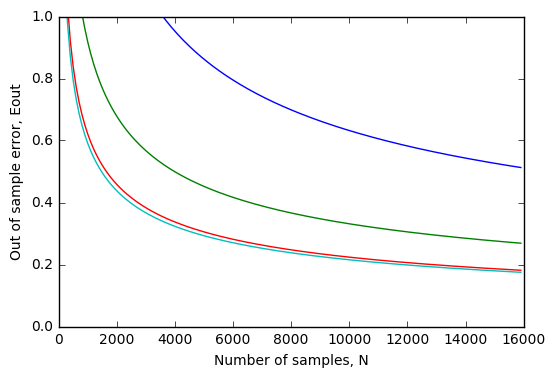

In [25]:
# Plotting the bounds

t1 = np.arange(3, 16000, 100.0)

epsilon_devroye = lambda N, dvc, delta: (2 + 
                                         np.sqrt(2 * N * (np.log(4) + logmH(1, N**2, dvc) - np.log(delta)) - 
                                                     4 * (np.log(4) + logmH(1, N**2, dvc) - np.log(delta)) + 
                                                        4)
                                        ) / (2 * (N - 2))

plt.plot(t1, vc(t1))
plt.plot(t1, rademacher(t1))
plt.plot(t1, parr_vdb(t1))
plt.plot(t1, epsilon_devroye(t1, dvc, delta))

plt.ylim((0,1.0))

plt.ylabel('Out of sample error, Eout')
plt.xlabel('Number of samples, N')
plt.show

Not quite clean, as I encountered some overflow issues, and due to laziness did not want to hunt for ways to numpy to accept my functions. Devroye function stolen from http://nbviewer.jupyter.org/github/tournami/Learning-From-Data-MOOC/blob/master/Homework%204.html

Either way, the answer is **d) Devroye**

### Exercise 3
For the same values of dvc and δ of Problem 2, but for small N, say N = 5,
which bound is the smallest?

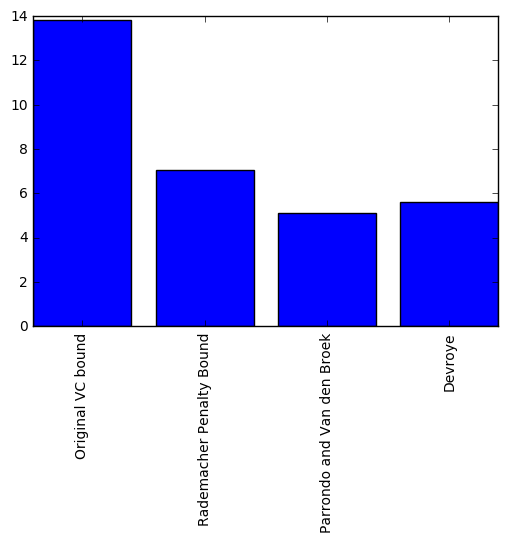

In [46]:
N = np.float(5)
epsilons = [vc(N), 
            rademacher(N),
            parr_vdb(N),
            epsilon_devroye(N, dvc, delta)] #Again using the stolen function

bounds = ("Original VC bound", 
          "Rademacher Penalty Bound", 
          "Parrondo and Van den Broek", 
          "Devroye")

#plt.title("$\epsilon$ at $N=5$")
#plt.ylabel("$\epsilon$")

plt.xticks([0.4, 1.4, 2.4, 3.4], bounds, rotation='vertical')

plt.bar(np.arange(4), epsilons)
plt.show()

We see that **c) Parrondo and Van den Broek** has the lowest generalization error with a low N.